# Part II - Ford GoBike System Dataset Analysis
## by Zhiyu Wang

## Investigation Overview


> In this investigation, I focued on several variables that can influence the frequency of rides: day of week and hour of day, and how duration of each ride can vary regarding different user types, days of week and hour of day.


## Dataset Overview

> The dataset describes information about 183,000 rides in the Ford GoBike System covering the greater San Francisco Bay area, with user behavior(duration, dateTime, station location) as well as user demographic information(user type, gender, age).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

#### Preliminary Wrangling
- Load dataset
- convert time to dateTime and split into year, month, day, day of week, hour.
- convert columns to proper data type
- drop rows with missing value
- drop outliers

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
# load in the dataset into a pandas dataframe

In [3]:
df.dropna(inplace = True)

#convert string to timestamp
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

df['start_month'] = df['start_time'].dt.month#start month
df['start_day'] = df['start_time'].dt.day#start day of month
df['start_day_of_week'] = df['start_time'].dt.day_name()#start day of week
df['start_hour'] = df['start_time'].dt.hour#start hour of day

df['end_month'] = df['end_time'].dt.month#end month
df['end_day'] = df['end_time'].dt.day#end day of month
df['end_day_of_week'] = df['end_time'].dt.day_name()#end day of week
df['end_hour'] = df['end_time'].dt.hour#end hour of day

df['start_station_id'] = df['start_station_id'].astype('str')
df['end_station_id'] = df['end_station_id'].astype('str')
df['bike_id'] = df['bike_id'].astype('str')

df['age'] = 2019 - df['member_birth_year']

df['duration_min'] = df['duration_sec']/60

df.reset_index(inplace = True)

base_color = sb.color_palette()[0]

high_outliers = (df['duration_min'] > 60)
print(high_outliers.sum()/df['duration_min'].sum())#proportion of outlier
df = df.loc[-high_outliers] # drop outliers

0.0006751825623499757


## Distribution of rides by day of week and hour

### On which day of week there are most traffic?
- On weekdays, the amount of rides doesn't have significant difference bewtween each other, around 27,500 trips per day.
- At weekends, the amount of rides decreases by around 50%, around 14,000 trips per day.

### At which time of day there are most traffic?
- The peak of traffic occurs around 7-9am and 16-18pm.
- Between 10am and 15pm, the hourly traffic is around 7,500.
- Before 7 am and after 18pm, the amount of rides decreases dramatically.
- During the midnight (1-5am), there are rarely people using GoBike.

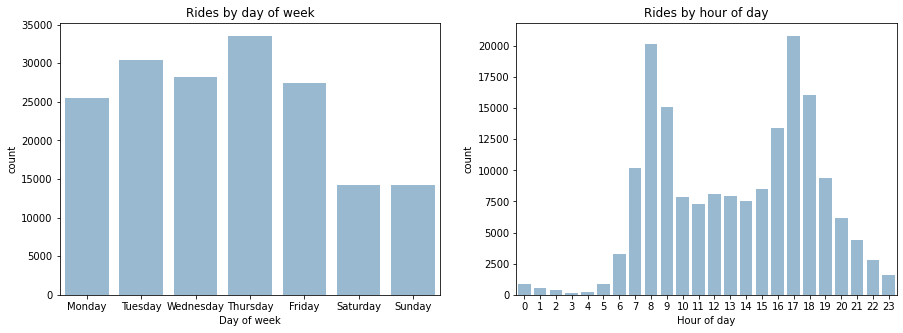

In [5]:
plt.figure(figsize = [15, 5])
plt.subplot(1, 2, 1)
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sb.countplot(data=df, x='start_day_of_week', color=base_color, alpha = 0.5,order = day_order);
plt.title('Rides by day of week')
plt.xlabel('Day of week');

plt.subplot(1, 2, 2)
sb.countplot(data=df, x='start_hour', color=base_color, alpha = 0.5);
plt.title('Rides by hour of day');
plt.xlabel('Hour of day');


## Duration by hour of day

### What's the average duration of each hour of day?

- There are two peaks in the Duration-Hour heat map, one between 8-10 am and the other between 16-18pm. 
- The duration of both peaks are 5-10 minutes. 
- Considering that most of the rides happen on weekdays. It's deduced that the most users choose to use GoBike to commute.
- Most of the users choose GoBike to travel a 5-10 minute distance.

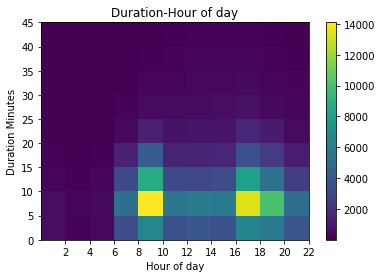

In [6]:
bins_x = np.arange(0,24,2)
bins_y = np.arange(0,50,5)
plt.hist2d(data = df, x = 'start_hour', y = 'duration_min',cmin=0.5, bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Hour of day')
plt.ylabel('Duration Minutes')
plt.xticks(np.arange(2, 24, 2))
plt.title('Duration-Hour of day');

## Duration by day of week per user type

### What's the usage patterns of different user types?

- The durations of **subscribers** among the week don't vary a lot on average between each other.
- The duration of **customers** are higher at weekends compared with that on weekdays.
- The average duration of **customers** are higher than that of **subscribers** everyday.
- The IQR of duration are higher at weekends for both groups.

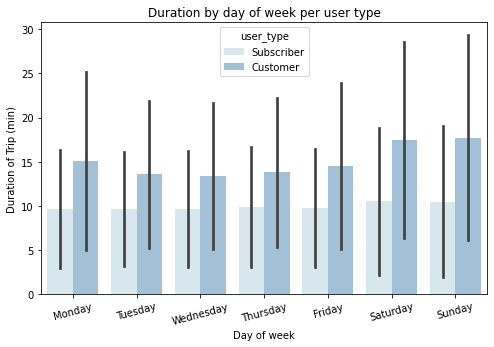

In [7]:
plt.figure(figsize = [8, 5])

sb.barplot(data=df, x='start_day_of_week', y='duration_min',hue = 'user_type', palette = 'Blues', ci='sd',alpha = 0.5,order = day_order)
plt.xticks(rotation=15);
plt.xlabel('Day of week')
plt.ylabel('Duration of Trip (min)');
plt.title('Duration by day of week per user type');


## Summary

- The typical usage secenario of GoBike is when people go to work and go back home after work on weekdays, within a 5-10 minute distance.
- The subscribers usually user GoBike to commute, which causes the drop of trip frequency at weekends.
- At weekends, there are more random customers to travel longer distances by GoBike.
- The usage pattern of customers don't have significant differences between weekdays and weekends.

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert Part_II.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II.ipynb to slides
[NbConvertApp] Writing 637740 bytes to Part_II.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II.slides.html
Use Control-C to stop this server


> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 